This chart_code.ipynb is meant to define the functions required to generate charts for the 4 bottom plots. 

In [60]:
# !pip install seaborn

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("../data/raw/van_weather_1974-01-01_2024-03-15.csv", index_col='date', parse_dates=True)

In [11]:
df.shape

(18337, 18)

In [12]:
df.head()

,weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
date,,,,,,,,,,,,,,,,,,
1974-01-01,1.0,1.2095,-3.9405,-1.628000,-2.615206,-9.347763,-6.263546,0,0,0.0,0.0,0.0,0.0,16.595179,29.519999,53.332990,5.45,0.636952
1974-01-02,2.0,-0.4405,-4.1905,-2.534250,-7.042604,-10.584426,-8.725637,0,0,0.0,0.0,0.0,0.0,25.264202,49.680000,47.123363,5.50,1.180610
1974-01-03,1.0,0.7595,-4.6405,-2.200917,-3.240397,-9.653935,-6.773499,0,0,0.0,0.0,0.0,0.0,17.673029,33.839996,62.702984,5.54,0.740243
1974-01-04,0.0,1.2595,-4.7405,-2.123833,-3.855434,-9.639334,-7.336088,0,0,0.0,0.0,0.0,0.0,21.096123,45.000000,41.982567,5.73,0.952258
1974-01-05,1.0,-0.7405,-5.3405,-3.017584,-5.951634,-11.345201,-8.649396,0,0,0.0,0.0,0.0,0.0,21.533897,41.039997,42.725307,5.85,1.095964


In [54]:
# Time aggregator input ['D', 'W', 'ME', 'YE']
# Start time in YYYY-MM-DD
# End time in YYYY-MM-DD

def filter_aggregation_col(column_name, agg_time, start_time, end_time):
    start_time = pd.to_datetime(start_time)
    end_time = pd.to_datetime(end_time)


    # Filter DataFrame based on time range
    filtered_df = df.loc[start_time:end_time]

    # Aggregate the specified column based on agg_time
    aggregated_df = filtered_df[column_name].resample(agg_time).mean()

    # Clear the data if the year is chosen and a full year does not exist for start/end year
    if agg_time == 'YE':
        # Find the start year and end year
        start_year = start_time.year
        end_year = end_time.year

        # Check if the start year and end year form a full year range
        if (start_time != pd.Timestamp(f"{start_year}-01-01")):  
            aggregated_df = aggregated_df.iloc[1:]
        
        if (end_time != pd.Timestamp(f"{end_year}-12-31")):
            aggregated_df = aggregated_df.iloc[:-1]
    
    return aggregated_df
    

In [57]:
df_agg = filter_aggregation_col('temperature_2m_max', 'YE', '1990-01-15', '2024-03-01')
df_agg

date
1991-12-31    12.762514
1992-12-31    13.918653
1993-12-31    12.784431
1994-12-31    13.222103
1995-12-31    13.541007
1996-12-31    11.945019
1997-12-31    12.912925
1998-12-31    13.493336
1999-12-31    12.403883
2000-12-31    12.281494
2001-12-31    12.326897
2002-12-31    12.676212
2003-12-31    13.313883
2004-12-31    13.622615
2005-12-31    13.059226
2006-12-31    13.139363
2007-12-31    12.179774
2008-12-31    11.878216
2009-12-31    12.783884
2010-12-31    12.917719
2011-12-31    11.732103
2012-12-31    12.334227
2013-12-31    12.808404
2014-12-31    13.520459
2015-12-31    14.348952
2016-12-31    13.562369
2017-12-31    12.889678
2018-12-31    13.395568
2019-12-31    12.927212
2020-12-31    12.763014
2021-12-31    12.920226
2022-12-31    12.854884
2023-12-31    13.642007
Freq: YE-DEC, Name: temperature_2m_max, dtype: float64

In [58]:
def time_series_plot(df):
    column_name = df.name
    
    # Set plot style
    sns.set_style("whitegrid")
    
    # Plot the column against the index
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df)
    plt.xlabel("Date")
    plt.ylabel(column_name)
    plt.title(f"{column_name} over Time")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

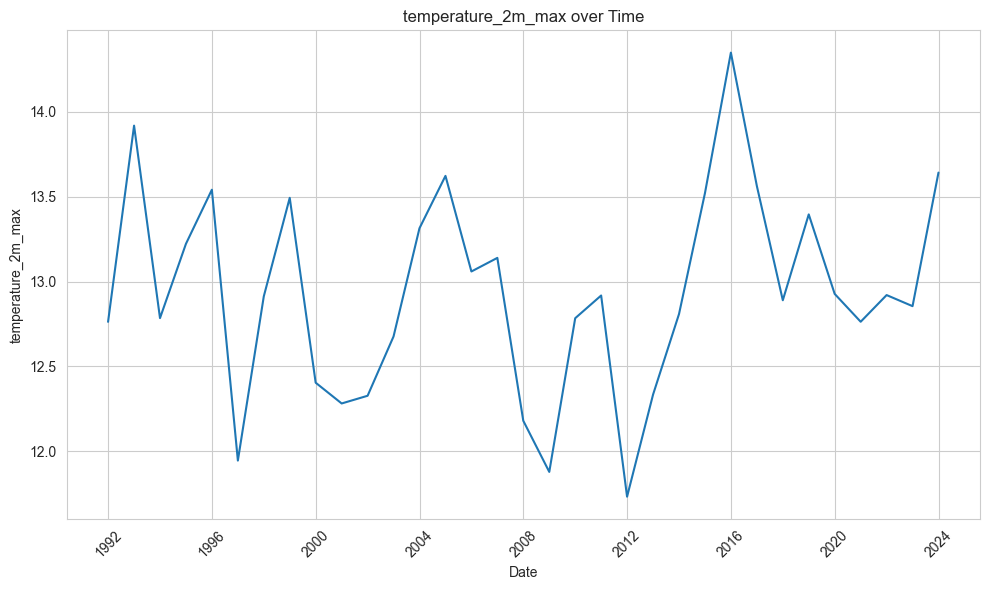

In [59]:
time_series_plot(df_agg)